# 1. Install Dependencies and Setup

In [1]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.3.0
agate                         1.6.3
aiohttp                       3.8.3
aiosignal                     1.2.0
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asn1crypto                    1.5.1
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.1.0
Automat                       20.2.0
Babel                         2.10.3
backcall                      0.2.0
bcrypt                        4.0.1
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.9
boto3                         1.24.95
botocore                      1.27.95
branca                        0.5.0
cachetools                    5.2.0
catalogue 

In [2]:
import tensorflow as tf 
import os

2023-05-11 20:37:31.973464: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 20:37:32.117966: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-11 20:37:32.123585: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-11 20:37:32.123607: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-05-11 20:37:33.617918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-11 20:37:33.617951: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-11 20:37:33.617969: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-e12bc7d3-6b03-4608-9bcb-a03ef893b7a9): /proc/driver/nvidia/version does not exist


In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import imghdr

In [6]:
data_dir = '/work/Cancer1'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image /work/Cancer1/BC/BC33.jpeg
Issue with image /work/Cancer1/BC/BC49.jpeg
Issue with image /work/Cancer1/BC/BC51.jpeg
Issue with image /work/Cancer1/BC/BC06.jpeg
Issue with image /work/Cancer1/BC/BC37.jpeg
Issue with image /work/Cancer1/BC/BC55.jpeg
Issue with image /work/Cancer1/BC/BC23.jpeg
Issue with image /work/Cancer1/BC/BC41.jpeg
Issue with image /work/Cancer1/BC/BC16.jpeg
Issue with image /work/Cancer1/BC/BC27.jpeg
Issue with image /work/Cancer1/BC/BC45.jpeg
Issue with image /work/Cancer1/BC/BC22.jpeg
Issue with image /work/Cancer1/BC/BC13.jpeg
Issue with image /work/Cancer1/BC/BC40.jpeg
Issue with image /work/Cancer1/BC/BC17.jpeg
Issue with image /work/Cancer1/BC/BC26.jpeg
Issue with image /work/Cancer1/BC/BC44.jpeg
Issue with image /work/Cancer1/BC/BC32.jpeg
Issue with image /work/Cancer1/BC/BC48.jpeg
Issue with image /work/Cancer1/BC/BC50.jpeg
Issue with image /work/Cancer1/BC/BC07.jpeg
Issue with image /work/Cancer1/BC/BC36.jpeg
Issue with image /work/Cancer1/B

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('/work/Cancer1')

Found 102 files belonging to 2 classes.
2023-05-11 20:37:34.427523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

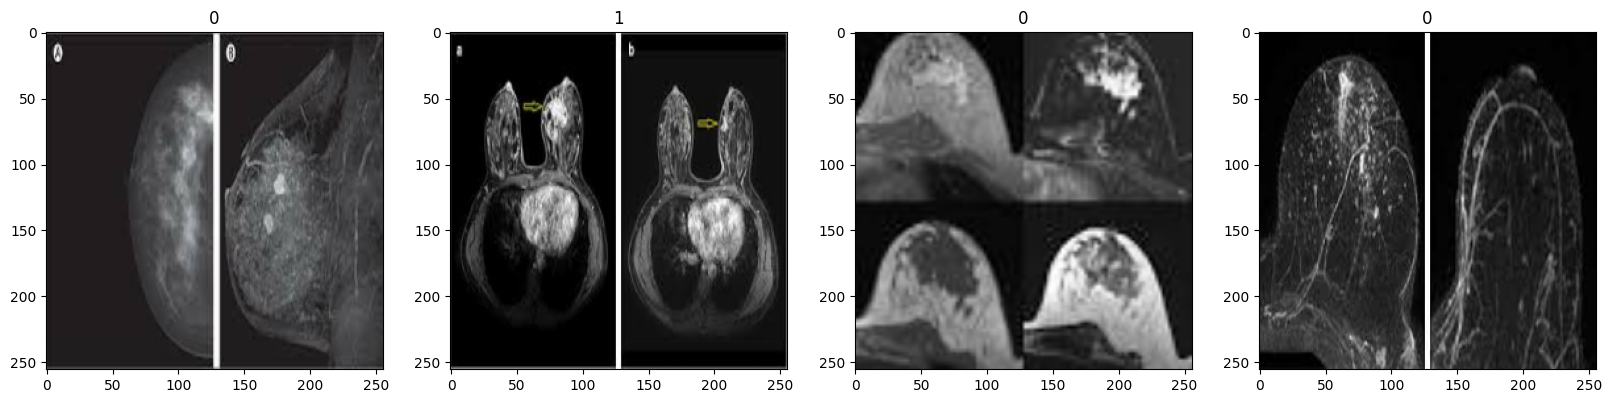

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.42745098, 0.42745098, 0.42745098],
          [0.4149816 , 0.4149816 , 0.4149816 ],
          [0.35830268, 0.35830268, 0.35830268],
          ...,
          [0.533701  , 0.533701  , 0.533701  ],
          [0.5398284 , 0.5398284 , 0.5398284 ],
          [0.5411765 , 0.5411765 , 0.5411765 ]],
 
         [[0.41363358, 0.41363358, 0.41363358],
          [0.40046912, 0.40046912, 0.40046912],
          [0.34063074, 0.34063074, 0.34063074],
          ...,
          [0.55608845, 0.55608845, 0.55608845],
          [0.5618209 , 0.5618209 , 0.5618209 ],
          [0.5630821 , 0.5630821 , 0.5630821 ]],
 
         [[0.35082722, 0.35082722, 0.35082722],
          [0.3345033 , 0.3345033 , 0.3345033 ],
          [0.2603037 , 0.2603037 , 0.2603037 ],
          ...,
          [0.6578496 , 0.6578496 , 0.6578496 ],
          [0.661787  , 0.661787  , 0.661787  ],
          [0.6626532 , 0.6626532 , 0.6626532 ]],
 
         ...,
 
         [[0.54641545, 0.54641545, 0.54641545],
          [0.53969

# 5. Split Data

In [16]:
count = 0
for batch in data:
    count += len(batch[0])
train_size = int(count * 0.7)
val_size = int(count * 0.2)
test_size = int(count * 0.1)


In [17]:
train_size

71

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 1s 141ms/step - loss: 0.6912 - accuracy: 0.5098
Epoch 2/20
4/4 [==============================] - 1s 137ms/step - loss: 0.5904 - accuracy: 0.6961
Epoch 3/20
4/4 [==============================] - 1s 139ms/step - loss: 0.4661 - accuracy: 0.8039
Epoch 4/20
4/4 [==============================] - 1s 152ms/step - loss: 0.4080 - accuracy: 0.8235
Epoch 5/20
4/4 [==============================] - 1s 119ms/step - loss: 0.3085 - accuracy: 0.8725
Epoch 6/20
4/4 [==============================] - 1s 116ms/step - loss: 0.2347 - accuracy: 0.9314
Epoch 7/20
4/4 [==============================] - 1s 139ms/step - loss: 0.1456 - accuracy: 0.9608
Epoch 8/20
4/4 [==============================] - 1s 137ms/step - loss: 0.0907 - accuracy: 0.9706
Epoch 9/20
4/4 [==============================] - 1s 135ms/step - loss: 0.1285 - accuracy: 0.9412
Epoch 10/20
4/4 [==============================] - 1s 138ms/step - loss: 0.2011 - accuracy: 0.9216
Epoch 11/20
4/4 [==

# 8. Plot Performance

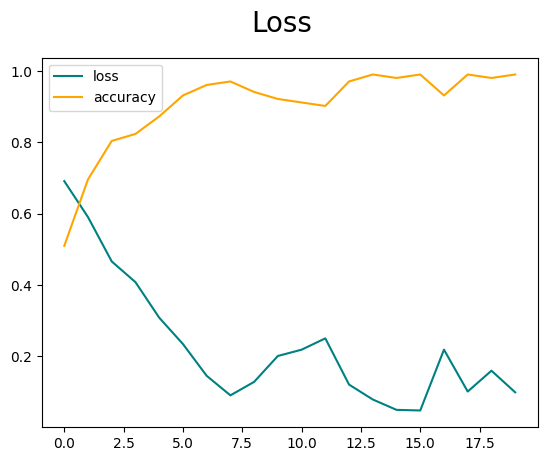

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [28]:
import pandas as pd
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [31]:
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(20):
    hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])
    train_loss.append(hist.history['loss'][0])
    train_accuracy.append(hist.history['accuracy'][0])


results = pd.DataFrame({'Train Accuracy': train_accuracy,
                       'Train Loss': train_loss,
                       'Epochs': range(1, 21)})

print(results)

4/4 [==============================] - 1s 135ms/step - loss: 0.1082 - accuracy: 0.9706
    Train Accuracy  Train Loss  Epochs
0         0.990196    0.082205       1
1         0.990196    0.058311       2
2         0.990196    0.042478       3
3         0.990196    0.039056       4
4         0.980392    0.027813       5
5         0.990196    0.030855       6
6         0.990196    0.021502       7
7         0.990196    0.020147       8
8         0.980392    0.018906       9
9         0.980392    0.018535      10
10        0.990196    0.014546      11
11        0.990196    0.018735      12
12        0.990196    0.014228      13
13        0.990196    0.028980      14
14        0.980392    0.034085      15
15        0.990196    0.029134      16
16        0.990196    0.066079      17
17        0.990196    0.128434      18
18        0.990196    0.091705      19
19        0.970588    0.108209      20


# 10. Test

In [32]:
from PIL import Image

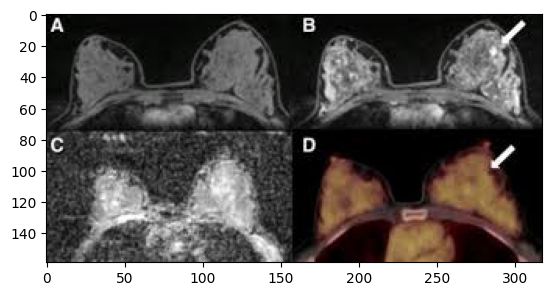

In [38]:
img = Image.open('/work/Cancer1/BC/BC28.jpeg')
plt.imshow(img)
plt.show()


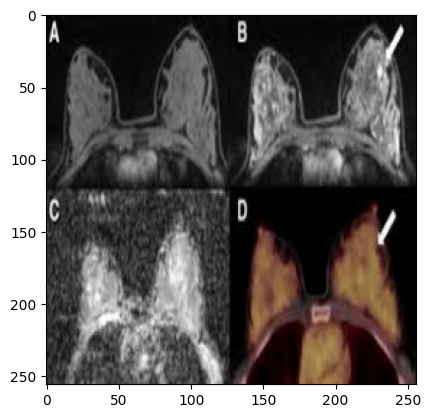

In [39]:

# Convert the image to a tensor
img_tensor = tf.keras.preprocessing.image.img_to_array(img)

# Resize the tensor
resize = tf.image.resize(img_tensor, (256,256))

# Display the resized image
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
img_rgb = img.convert('RGB')
img_resized = img_rgb.resize((256, 256))

# Convert to numpy array
img_array = np.array(img_resized)

# Preprocess image and make prediction
yhat = model.predict(np.expand_dims(img_array/255, 0))


1/1 [==============================] - 0s 95ms/step


In [41]:
predicted_class = np.argmax(yhat)

# Get the test accuracy and test loss for the predicted class
test_accuracy = yhat[0][predicted_class]
test_loss = -np.log(yhat[0][predicted_class])

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.09556037
Test Loss: 2.3479972


In [42]:
if yhat < 0.5: 
    print(f'Predicted class is BreastCancer')
else:
    print(f'Predicted class is Mastitis')

Predicted class is BreastCancer


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e12bc7d3-6b03-4608-9bcb-a03ef893b7a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>